# Entropy maps or voxets as a local measure of uncertainty
Here we use Shanon's entropy (See e.g. https://en.wikipedia.org/wiki/Entropy_(information_theory)).

Let us consider the variable $X$ that represent a voxel property and assume that it can take $n$ distinct values among an ensemble of voxets. By denoting the probability of observing the $i^{th}$ possible value as $p_i$, the entropy $H$ of $X$ is computed as follows:

$$
H(X)=-\sum \limits _{i=1} ^{n} p_i \log p_i
$$

In [1]:
# import modules
from matplotlib import pyplot as plt
# import numpy as np
from datetime import datetime
import pickle
from uncertaintyIndicators import entropy,entropyNcardinality,continuous_entropy, plot_cardinality

picklefilenamedata = "./pickledata/testing-model-subset.pickle"
picklefilenameentropy = "./pickledata/testing-model-subset-entropy.pickle"

# import data
with open(picklefilenamedata, 'rb') as f:
    [grv_all,mag_all,mod_all,rho_all,sus_all,cmap,samples_ix] = pickle.load(f)

## Categorical variable
The definition of Shanon's entropy is valid for discrete variables. 

In [2]:
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING ENTROPY START")
ent = entropy(mod_all)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING ENTROPY END")

13-Jul-2021 (16:28:09) - COMPUTING ENTROPY START
13-Jul-2021 (16:28:24) - COMPUTING ENTROPY END


## Continuous variable
In the continuous case, one need to discretize the continuous domain and integrate with the width of the bins.
See paper of C. Marsh at https://www.crmarsh.com/static/pdf/Charles_Marsh_Continuous_Entropy.pdf

Here we discretize the support of the continuous variable $X$ in $n$ regular bins and by denoting $p_i$ as the probability to observe a value in the $i^{th}$ bin, we can apply equation (1).


In [3]:
nbins=50
# AND NOW for DENSITY
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING CONTINUOUS ENTROPY DENSITY START")
ent_rho = continuous_entropy(rho_all,nbins)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING CONTINUOUS ENTROPY DENSITY END")

# AND NOW for MAGNETIC SUSCEPTIBILITY
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING CONTINUOUS ENTROPY MAGNETIC SUSCEPTIBILITY START")
ent_sus = continuous_entropy(sus_all,nbins)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING CONTINUOUS ENTROPY MAGNETIC SUSCEPTIBILITY END")

# AND NOW for MAGNETIC RESPONSE
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING CONTINUOUS ENTROPY MAGNETIC RESPONSE START")
ent_mag = continuous_entropy(mag_all,nbins)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING CONTINUOUS ENTROPY MAGNETIC RESPONSE END")

# AND NOW for GRAVITY RESPONSE
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING CONTINUOUS ENTROPY GRAVITY RESPONSE START")
ent_grv = continuous_entropy(grv_all,nbins)
print((datetime.now()).strftime('%d-%b-%Y (%H:%M:%S)')+" - "+"COMPUTING CONTINUOUS ENTROPY GRAVITY RESPONSE END")


13-Jul-2021 (16:28:24) - COMPUTING CONTINUOUS ENTROPY DENSITY START
13-Jul-2021 (16:29:32) - COMPUTING CONTINUOUS ENTROPY DENSITY END
13-Jul-2021 (16:29:32) - COMPUTING CONTINUOUS ENTROPY MAGNETIC SUSCEPTIBILITY START
13-Jul-2021 (16:30:05) - COMPUTING CONTINUOUS ENTROPY MAGNETIC SUSCEPTIBILITY END
13-Jul-2021 (16:30:05) - COMPUTING CONTINUOUS ENTROPY MAGNETIC RESPONSE START
13-Jul-2021 (16:30:05) - COMPUTING CONTINUOUS ENTROPY MAGNETIC RESPONSE END
13-Jul-2021 (16:30:05) - COMPUTING CONTINUOUS ENTROPY GRAVITY RESPONSE START
13-Jul-2021 (16:30:06) - COMPUTING CONTINUOUS ENTROPY GRAVITY RESPONSE END


## Plot

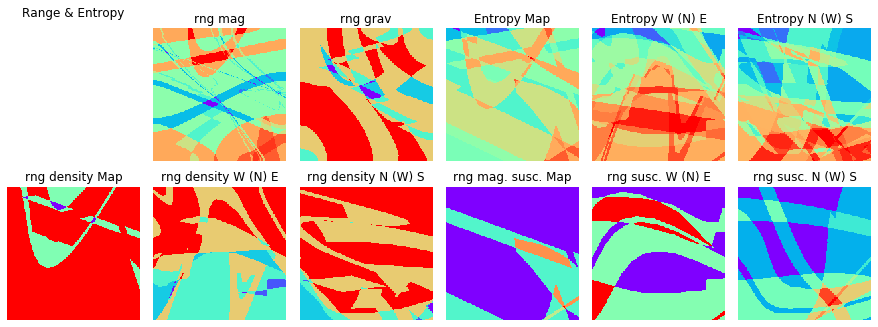

In [4]:
# PLOT DISCRETE AND CONTINUOUS ENTROPY
plot_cardinality(ent_mag,ent_grv,ent,ent_rho,ent_sus,'Range','rng','Entropy')

## Save computed indicators

In [5]:
with open(picklefilenameentropy, 'wb') as f:
    pickle.dump([ent_grv,ent_mag,ent,ent_rho,ent_sus], f)